In [2]:
import numpy as np
import scipy.stats as sp
from scipy import stats
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest

### 정규분포 그리기

array([20.943, 17.618, 22.865, ..., 20.059, 17.559, 20.768])

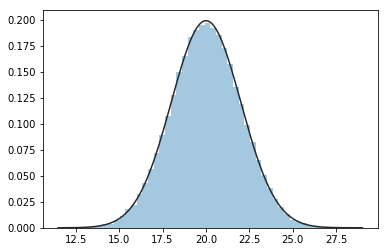

In [3]:
np.random.seed(seed=1234)
normal = np.random.normal(20,2,100000)
sns.distplot(normal, fit=stats.norm, kde=False)

normal.round(3)

array([31.179, 27.023, 33.582, ..., 32.576, 26.347, 31.613])

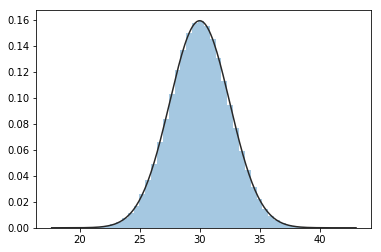

In [6]:
mu = 115
sigma = 20
x = 135
prop = stats.norm.cdf(x, mu, sigma)
print("{0}분 이상 걸리는 A/S작업 비율 : {1:.1f}%".format(x,(1-prop) * 100))

135분 이상 걸리는 A/S작업 비율 : 15.9%


In [9]:
mu = 175
sigma = 5
x = 180
prop = stats.norm.cdf(x, mu, sigma)
print("{0}내 키의 위치 : {1:.1f}%".format(x,(prop) * 100))

180내 키의 위치 : 84.1%


In [26]:
#1, 12Km이상 15Km이하를 달릴 확률
mu = 12
sigma = 3
x = 12
y = 15
z = 9
prop = stats.norm.cdf(y, mu, sigma)

#2
#9km 이상 15km 이하를 달릴 확률은 얼마인가
prop2 = stats.norm.cdf(x, mu, sigma)

#3
#15km 이상를 달릴 확률은 얼마인가
prop3 = stats.norm.cdf(z, mu, sigma)

print("1리터를 가지고  {0}km 이상 {1}km 이하 달릴 확률 : {2:.1f}%".format(x,y,(prop - prop2) * 100))
print("1리터를 가지고  {0}km 이상 {1}km 이하 달릴 확률 : {2:.1f}%".format(z,y,(prop - prop3) * 100))
print("1리터를 가지고  {0}km 이상 달릴 확률 : {1:.1f}%".format(y,(1 - prop) * 100))

1리터를 가지고  12km 이상 15km 이하 달릴 확률 : 34.1%
1리터를 가지고  9km 이상 15km 이하 달릴 확률 : 68.3%
1리터를 가지고  15km 이상 달릴 확률 : 15.9%


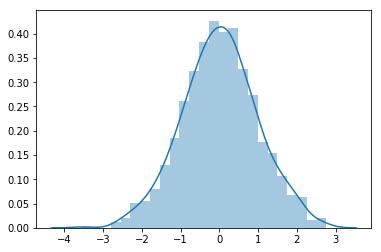

In [4]:
np.random.seed(seed = 1234)
normal = np.random.normal(0,1,1000)
sns.distplot(normal)


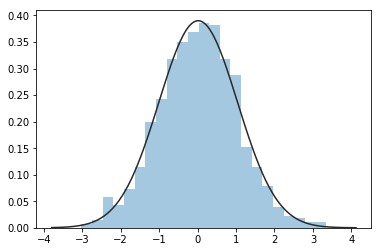

In [30]:
np.random.seed(seed=1234)
t_df29 = np.random.standard_t(df = 29, size = 1000)
sns.distplot(t_df29, fit = stats.norm, kde = False)

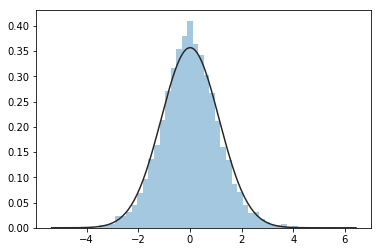

In [29]:
np.random.seed(seed=1234)
t_df29 = np.random.standard_t(df = 10, size = 10000)
sns.distplot(t_df29, fit = stats.norm, kde = False)



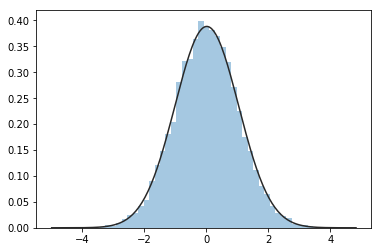

In [25]:
t_df29_2 = np.random.standard_t(df = 50, size = 10000)
sns.distplot(t_df29_2, fit = stats.norm, kde = False)

---
### t분포

In [21]:
t = 1.53
df = 5

prop = stats.t.cdf(t,df)
print("P(T<={0}):{1:.3f}".format(t,prop))

P(T<=1.53):0.907


In [22]:
t = 2.0
df = 10

prop = stats.t.cdf(t,df)
print("P(T<={0}):{1:.3f}".format(t,prop))

P(T<=2.0):0.963


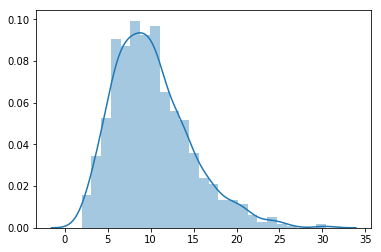

In [39]:
np.random.seed(seed = 1234)
chisq_df10 = np.random.chisquare(df = 10, size = 1000)
sns.distplot(chisq_df10, kde = True)


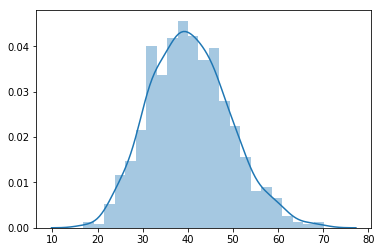

In [32]:
chisq_df40 = np.random.chisquare(df = 40, size = 1000)
sns.distplot(chisq_df40, kde = True)

---
### x^2 분포

In [34]:
chisq = 10
df = 30

prop = stats.chi2.cdf(chisq, df)
print("P(X<={}):{:.4f}".format(chisq, prop))

P(X<=10):0.0002


In [36]:
chisq = 3.0
df = 8

prop = stats.chi2.cdf(chisq, df)
print("P(X<={}):{:.6f}".format(chisq, prop))

P(X<=3.0):0.065642


---
### F분포

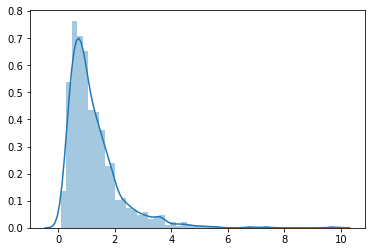

In [40]:
np.random.seed(seed = 1234)
F_df10_10 = np.random.f(dfnum = 10, dfden = 10, size = 1000)
sns.distplot(F_df10_10, kde = True)

---
### 와이블 분포

In [41]:
x = 1500
alpha = 2.2
beta = 1200

prop = stats.weibull_min.cdf(x, alpha, scale = beta)
print("P(X>={}): {:.5f}".format(x,(1-prop)))

P(X>=1500): 0.19518


In [42]:
x = 2500
alpha = 5.2
beta = 2200

prop = stats.weibull_min.cdf(x, alpha, scale = beta)
print("P(X>={}): {:.5f}".format(x,(1-prop)))

P(X>=2500): 0.14313


---
### 이하분포

In [44]:
n = 3
for i in range(n + 1):
    prop = stats.binom.pmf(k = i, n = n, p = 0.4)
    print("P(X={}) = {:.3f}".format(i, prop))

P(X=0) = 0.216
P(X=1) = 0.432
P(X=2) = 0.288
P(X=3) = 0.064


In [45]:
n = 5
for i in range(n + 1):
    prop = stats.binom.pmf(k= i, n = n, p = 0.3)
    print("P(X={}) = {:.3f}".format(i, prop))

P(X=0) = 0.168
P(X=1) = 0.360
P(X=2) = 0.309
P(X=3) = 0.132
P(X=4) = 0.028
P(X=5) = 0.002


In [46]:
mu = 2
prop = stats.poisson.pmf(3,mu)
cdf_prop = stats.poisson.cdf(2,mu)

print("1분당 {}번의 전화가 걸려올 확률:{:.4f}".format(3,prop))
print("1분당 쵀대 {}회 이하의 전화가 걸려올 확률:{:.4f}".format(2,cdf_prop))

1분당 3번의 전화가 걸려올 확률:0.1804
1분당 쵀대 2회 이하의 전화가 걸려올 확률:0.6767


In [49]:
mu = 2
prop = stats.poisson.pmf(2,mu)
cdf_prop = stats.poisson.cdf(1,mu)
cdf_prop2 = stats.poisson.cdf(3,mu)

print("{}명의 손님이 도착할 확률:{:.4f}".format(2,prop))
print("{}명 이하의 손님이 도착할 확률:{:.4f}".format(1,cdf_prop))
print("{}명 이하의 손님이 도착할 확률:{:.4f}".format(2,(1-cdf_prop2)))

2명의 손님이 도착할 확률:0.2707
1명 이하의 손님이 도착할 확률:0.4060
2명 이하의 손님이 도착할 확률:0.1429


---
### 기술통계

In [9]:
ds_mycars = pd.read_csv("../Bigdata/data/mycars.csv", engine = "python")
ds_mycars.head()

,manufacturer,model,displacement,year,cylinder,automatic,driving,mpg,highway_mileage,fuel,class
0,audi,a4,1.8,1999,4,auto,f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual,f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual,f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto,f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto,f,16,26,p,compact


In [10]:
df = ds_mycars[['model','mpg']]
df.head()


,model,mpg
0,a4,18
1,a4,21
2,a4,20
3,a4,21
4,a4,16


In [15]:
df.groupby('model').describe().head()

mpg                                                     
            count       mean       std   min    25%   50%    75%   max
model                                                                 
4runner 4wd   6.0  15.166667  0.752773  14.0  15.00  15.0  15.75  16.0
a4            7.0  18.857143  1.864454  16.0  18.00  18.0  20.50  21.0
a4 quattro    8.0  17.125000  1.807722  15.0  15.75  17.0  18.25  20.0
a6 quattro    3.0  16.000000  1.000000  15.0  15.50  16.0  16.50  17.0
altima        6.0  20.666667  1.966384  19.0  19.00  20.0  22.50  23.0

In [36]:
ds_Exh_QC1 = pd.read_csv("../Bigdata/data/EXH_QC1.csv",engine="python")
ds_Exh_QC1.head()

,Flaws,Period,Strength,Baking Time,Cabbage weight
0,Scratch,Day,37.6,0.798922,3.6
1,Scratch,Day,38.6,0.849020,2.9
2,Peel,Day,37.2,0.816163,2.8
3,Peel,Day,36.4,0.758266,2.6
4,Smudge,Day,38.6,0.815894,3.4


In [18]:
df = ds_Exh_QC1[['Flaws', 'Period']]
count = df['Flaws'].value_counts().sort_index()
count

Other       6
Peel       15
Scratch    13
Smudge      6
Name: Flaws, dtype: int64

In [19]:
cumcnt = np.cumsum(count)
cumcnt

Other       6
Peel       21
Scratch    34
Smudge     40
Name: Flaws, dtype: int64

In [20]:
percent = count/sum(count)*100
percent

Other      15.0
Peel       37.5
Scratch    32.5
Smudge     15.0
Name: Flaws, dtype: float64

In [21]:
cumpct = np.cumsum(percent)
cumpct

Other       15.0
Peel        52.5
Scratch     85.0
Smudge     100.0
Name: Flaws, dtype: float64

In [22]:
count_data = pd.DataFrame({'Count':count, 'CumCnt':cumcnt, 'Percent':percent, 'CumPct':cumpct})
count_data

,Count,CumCnt,Percent,CumPct
Other,6,6,15.0,15.0
Peel,15,21,37.5,52.5
Scratch,13,34,32.5,85.0
Smudge,6,40,15.0,100.0


In [23]:
count_data.columns.name='Flaws'
count_data

Flaws,Count,CumCnt,Percent,CumPct
Other,6,6,15.0,15.0
Peel,15,21,37.5,52.5
Scratch,13,34,32.5,85.0
Smudge,6,40,15.0,100.0


---

In [24]:
count2 = df['Period'].value_counts().sort_index()
count2

Day         7
Evening     7
Night      19
Weekend     7
Name: Period, dtype: int64

In [25]:
cumcnt2 = np.cumsum(count2)
cumcnt2

Day         7
Evening    14
Night      33
Weekend    40
Name: Period, dtype: int64

In [27]:
percent2 = count2/sum(count2)*100
percent2

Day        17.5
Evening    17.5
Night      47.5
Weekend    17.5
Name: Period, dtype: float64

In [31]:
cumpct2 = np.cumsum(percent2)
cumpct2


Day         17.5
Evening     35.0
Night       82.5
Weekend    100.0
Name: Period, dtype: float64

In [33]:
count_data2 = pd.DataFrame({'Count':count2, 'CumCnt':cumcnt2, 'Percent2':percent2, 'CumPct':cumpct2})
count_data2

,Count,CumCnt,Percent2,CumPct
Day,7,7,17.5,17.5
Evening,7,14,17.5,35.0
Night,19,33,47.5,82.5
Weekend,7,40,17.5,100.0


In [35]:
count_data2.columns.name='Period'
count_data2

Period,Count,CumCnt,Percent2,CumPct
Day,7,7,17.5,17.5
Evening,7,14,17.5,35.0
Night,19,33,47.5,82.5
Weekend,7,40,17.5,100.0
